In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

In [5]:
xs = np.vstack([np.loadtxt(f'simulation_1000objects_10orbit_{i}.txt') for i in range(1,10)])

N = int(xs.shape[1]/6)

cols = np.arange(xs.shape[1])
cols = [col for col in np.arange(xs.shape[1]) if col%6 in [0, 1, 2]]

xs = xs[:,cols]

ys = xs.reshape(xs.shape[0],N,3)

ys = ys[::5]

/tmp/ipykernel_6567/4212319005.py:7: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = p3.Axes3D(fig)
/tmp/ipykernel_6567/4212319005.py:9: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


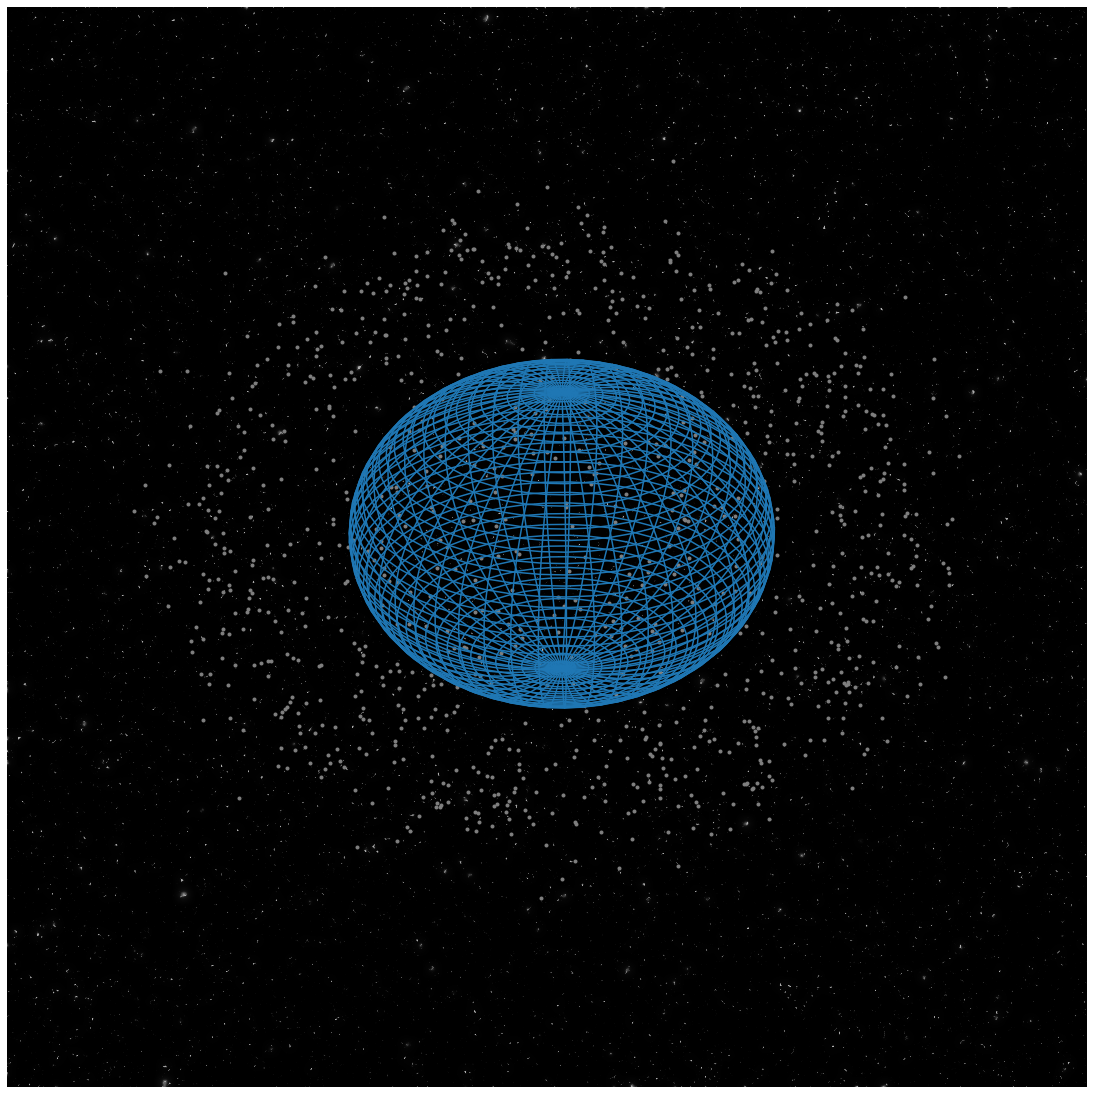

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation

fig,ax0 = plt.subplots(figsize=(15,15))
ax = p3.Axes3D(fig)

fig.tight_layout()
ax.axis('auto')

axis_size = 1e7
ax.set_xlim(-axis_size,axis_size)
ax.set_ylim(-axis_size,axis_size)
ax.set_zlim(-axis_size,axis_size)

galaxy_image = plt.imread('stars-964022.png')
ax0.imshow(galaxy_image)
ax0.set_axis_off()

ax.set_facecolor('#00000000')
ax.set_axis_off()

fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)

ax.grid(False)



# Plot the first position for all particles
h = ax.plot(*ys[0].T, marker='.', linestyle='None', color='grey')[0]
# Equivalent to
# h = ax.plot(data[0, :, 0], data[0, :, 1], data[0, :, 2], 
#             marker='.', linestyle='None')[0]

u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j]
a = 6.371e6 * np.cos(u)*np.sin(v)
b = 6.371e6 * np.sin(u)*np.sin(v)
c = 6.371e6 * np.cos(v)
earth = ax.plot_wireframe(a, b, c, color="tab:blue")
visdict = {}
visdict['earth'] = [earth]

# Setting the axes properties
ax.set_xlim3d([-1e7, 1e7])
ax.set_xlabel('X')

ax.set_ylim3d([-1e7, 1e7])
ax.set_ylabel('Y')

ax.set_zlim3d([-1e7, 1e7])

def update_particles(num):
    # Plot the iterations up to num for all particles
    h.set_xdata(ys[num, :, 0].ravel())
    h.set_ydata(ys[num, :, 1].ravel())
    h.set_3d_properties(ys[num, :, 2].ravel())
    return h

prtcl_ani = animation.FuncAnimation(fig, update_particles, frames=ys.shape[0],
                                    interval=10)

writergif = animation.PillowWriter(fps=30) 
prtcl_ani.save('t.gif', writer=writergif)